# Integration for data points
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/numerical-calculus-integration-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numerical approximation of integrals

The methods for numerical approximation that we will study here rely in the idea of approximate 
$$\int_a^b f(x)\operatorname{d}x\,,$$
by using some polinomial $p$, such that
$$\int_a^b f(x)\operatorname{d}x\approx \int_a^b P_n(x)\operatorname{d}x\,,$$
The integral of a polynomial can be calculated analytically because we know its antiderivative.

Since, as we seen in [Lagrange-Polynomial](interpolation.ipynb#Lagrange-Polynomial), the next polynomial of $n$th-degree 
$$P_n(x) = \sum_{i=0}^n f(x_i)L_{n,i}(x) = \sum_{i=0}^n y_iL_{n,i}(x)\,,$$
where 
$$L_{n,i}(x) = \prod_{\begin{smallmatrix}m=0\\ m\neq i\end{smallmatrix}}^n \frac{x-x_m}{x_i-x_m} =\frac{(x-x_0)}{(x_i-x_0)}\frac{(x-x_1)}{(x_i-x_1)}\cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})}\underbrace{\frac{}{}}_{m\ne i}
\frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_{n-1})}{(x_i-x_{n-1})}\frac{(x-x_n)}{(x_i-x_n)}  $$
Given a well-behaved function $f(x)$, we have then

$$f(x) \approx \sum_{k=0}^n f(x_k)L_{n,k}(x)$$

\begin{align}
%$$ trick notebook cell
\int_a^b f(x)dx =& \int_a^b\sum_{k=0}^n f(x_k)L_{n,k}(x)dx \\
=&\sum_{k=0}^n f(x_k) \int_a^b L_{n,k}(x)dx \\
=&\sum_{k=0}^n f(x_k) \omega_k \,
%$$
\end{align}
<!-- http://pages.cs.wisc.edu/~amos/412/lecture-notes/lecture18.pdf -->
where $\omega_k$ is a _weight_ applied to each function value:
$$\omega_k = \int_a^b L_{n,k}(x) dx= \int_a^b\prod_{j=0,\ j\neq k}^{n}\frac{(x-x_j)}{(x_k-x_j)}dx$$
Note that, since Lagrange polynomials do not depend on the function, we can calculate the weights $\omega_i$ using only the nodes $[x_0,x_1,\ldots x_n]$

### Error calculation
Including the error, the previous function $f(x)$ can be written as

$$f(x) = \sum_{k=0}^n f(x_k)L_{n,k}(x) + \frac{(x-x_0)(x-x_1)\cdots(x-x_n)}{(n+1)!}f^{(n+1)}(\xi(x))$$

with $L_{n,k}(x)$ the lagrange basis functions. Integrating $f(x)$ over $[a,b]$, we obtain the next expression:

$$\int_a^b f(x)dx = \int_a^b\sum_{k=0}^n f(x_k)L_{n,k}(x)dx + \int_a^b\frac{(x-x_0)(x-x_1)\cdots(x-x_n)}{(n+1)!}f^{(n+1)}(\xi(x))dx$$

It is worth mentioning this expression is a number, unlike differentiation where we obtained a function.

We can readily convert this expression in a weighted summation as

$$\int_a^b f(x)dx = \sum_{k=0}^n \omega_i\,f(x_k) + \frac{1}{(n+1)!}\int_a^bf^{(n+1)}(\xi(x)) \prod_{k=0}^{n}(x-x_k)dx$$


Finally, the quadrature formula or **Newton-Cotes formula** is given by the next expression:

$$\int_a^b f(x) dx = \sum \omega_i\, f(x_i) + E[f]$$

where the estimated error is 

$$E[f] = \frac{1}{(n+1)!}\int_a^bf^{(n+1)}(\xi(x)) \prod_{k=0}^{n}(x-x_k)dx $$

Asumming besides intervals equally spaced such that $x_i = x_0 + i\times h$, the error formula becomes:

$$E[f] = \frac{h^{n+3}f^{n+2}(\xi)}{(n+1)!}\int_0^nt^2(t-1)\cdots(t-n) $$

if $n$ is even and

$$E[f] = \frac{h^{n+2}f^{n+1}(\xi)}{(n+1)!}\int_0^nt(t-1)\cdots(t-n) $$

if $n$ is odd.

Below is a simple implementation of the quadrature formula or **Newton-Cotes formula** by using the implementation in `scipy` of the Interpolation polynomial in the Lagrangian form of order $n$ discussed in [Interpolation](./interpolation.ipynb#Implementation-in-Scipy) from  `scipy interpolation`

In [ ]:
%pylab inline
import numpy as np
from scipy import interpolate
import scipy.integrate as integrate

In [17]:
def F(Y,X):
    '''
    Antiderivate approximantion with Lagrange Polynomial 
    '''
    return interpolate.lagrange( X, Y ).integ()

In [18]:
def Quadrature(Y,X):
    '''
    Antiderivate approximantion with Lagrange Polynomial 
    '''
    antif=F(Y,X)
    return antif(X[-1])-antif(X[0])

In [19]:
def PlotQuadrature( f, X, xmin, xmax, ymin, ymax, fig=None, leg=True ):
    '''
    Implementation of Newton-Cotes formula for A SINGLE INTERVAL
    f: Function to integrate in A SINGLE INTERVAL
    X: nodes of the Lagrangian interpolation polynomial
    xmin,xmax,ymin, ymax: size of the figure
    '''
    Y = f( X )
    
    #X array
    Xarray = np.linspace( xmin, xmax, 1000 )
    #X area
    Xarea = np.linspace( X[0], X[-1], 1000 )
    #F array
    Yarray = f( Xarray )
    
    #Lagrange polynomial
    Ln = interpolate.lagrange( X, Y )
    #Interpolated array
    Parray = Ln( Xarray )
    #Interpolated array for area
    Parea = Ln( Xarea )
    
    #Plotting
    if fig==None:
        fig = plt.figure( figsize = (8,8) )
    ax = fig.add_subplot(111)
    #Function
    ax.plot( Xarray, Yarray, linewidth = 3, color = "blue", label="$f(x)$" )
    #Points
    ax.plot( X, Y, "o", color="red", label="points", zorder = 10 )
    #Interpolator
    ax.plot( Xarray, Parray, linewidth = 2, color = "black", label="$P_{%d}(x)$"%(len(X)-1) )
    #Area
    ax.fill_between( Xarea, Parea, color="green", alpha=0.5 )
    
    #Format
    ax.set_title( "%d-point Quadrature"%(len(X)), fontsize=16 )
    ax.set_xlim( (xmin, xmax) )
    ax.set_ylim( (0, 4) )
    ax.set_xlabel( "$x$" )
    ax.set_ylabel( "$y$" )
    if leg:
        ax.legend( loc="upper left", fontsize=16 )
    ax.grid(1)
    
    return Quadrature(Y,X)

## Trapezoidal rule
Using the previous formula, it is easily to derivate a set of low-order approximations for integration. Asumming a function $f(x)$ and an interval $[x_0,x_1]$, the associated quadrature formula is that obtained from a first-order Lagrange polynomial $P_1(x)$ given by:

$$P_1(x) = \frac{(x-x_1)}{x_0-x_1}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)$$

Using this, it is readible to obtain the integrate:

$$\int_{x_0}^{x_1}f(x)dx = \frac{h}{2}[ f(x_0) + f(x_1) ]-\frac{h^3}{12}f^{''}(\xi)$$

with $\xi \in [x_0, x_1]$ and $h = x_1-x_0$.

### Simple implementation

Full=4.245647748216942, trapezoid=3.775154904633847, rectangle=3.7751549046338475


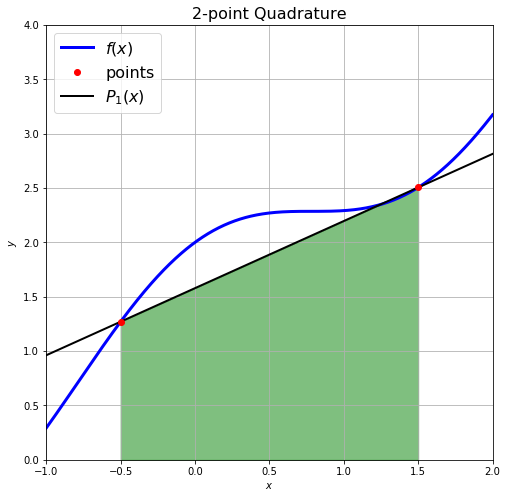

In [20]:
#Function
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with 2 points (Trapezoidal rule)
a=-0.5
b=1.5
X = np.array([a,b])
Q=PlotQuadrature( f, X, xmin=-1, xmax=2, ymin=0, ymax=4 )
print('Full={}, trapezoid={}, rectangle={}'.format( integrate.quad(f,a,b)[0] ,  Quadrature(f(X),X), (b-a)*(f(b)+f(a))/2 ) )

In [6]:
(b-a)*f(a),(b-a)*f(b)

(2.5403023058681398, 5.010007503399555)

### [Scipy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#r78)

In [21]:
integrate.trapz?

Signature: integrate.trapz(y, x=None, dx=1.0, axis=-1)
Docstring:
Integrate along the given axis using the composite trapezoidal rule.

Integrate `y` (`x`) along given axis.

Parameters
----------
y : array_like
    Input array to integrate.
x : array_like, optional
    The sample points corresponding to the `y` values. If `x` is None,
    the sample points are assumed to be evenly spaced `dx` apart. The
    default is None.
dx : scalar, optional
    The spacing between sample points when `x` is None. The default is 1.
axis : int, optional
    The axis along which to integrate.

Returns
-------
trapz : float
    Definite integral as approximated by trapezoidal rule.

See Also
--------
sum, cumsum

Notes
-----
Image [2]_ illustrates trapezoidal rule -- y-axis locations of points
will be taken from `y` array, by default x-axis distances between
points will be 1.0, alternatively they can be provided with `x` array
or with `dx` scalar.  Return value will be equal to combined area under
the

In fact, as expected

In [8]:
Y=f(X)
integrate.trapz(f(X),X)

3.7751549046338475

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Composite_trapezoidal_rule_illustration.png/1200px-Composite_trapezoidal_rule_illustration.png" height="400" width="400">

For a better approximation we can use more intervals

In [22]:
x=np.linspace( X[0], X[-1], 1000 )
integrate.trapz(f(x),x)

4.245647420030478

In [23]:
X[0]

-0.5

In [24]:
X[-1]

1.5

## Simpson's rule

A slightly better approximation to integration is the Simpson's rule. For this, assume a function $f(x)$ and an interval $[x_0,x_2]$, with a intermediate point $x_1$. The associate second-order Lagrange polynomial is given by: See previous [exercise](./interpolation.ipynb#Exercise-interpolation)

$$P_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)$$

The final expression is then:

$$\int_{x_0}^{x_2} f(x)dx = \frac{h}{3}[ f(x_0)+4f(x_1)+f(x_2) ]-\frac{h^5}{90}f^{(4)}(\xi)$$


Full=4.245647748216942, P2=4.285253172123376, rectangle=3.7751549046338475


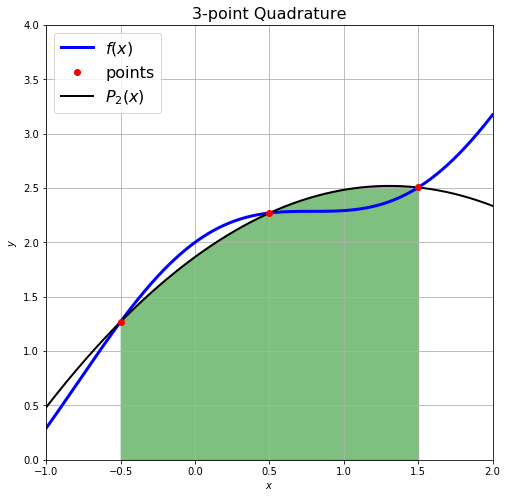

In [25]:
#Function
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with 3 points (Simpson's rule)
a=-0.5
b=1.5
x0=0.5
X = np.array([a,x0,b])
Q=PlotQuadrature( f, X, xmin=-1, xmax=2, ymin=0, ymax=4 )
print('Full={}, P2={}, rectangle={}'.format( integrate.quad(f,a,b)[0] ,  Quadrature(f(X),X), (b-a)*(f(b)+f(a))/2 ) )

### Scipy implementation
Improves with number of points:
![Simpons](https://upload.wikimedia.org/wikipedia/en/thumb/6/67/Simpsonsrule2.gif/220px-Simpsonsrule2.gif)

In [11]:
integrate.simps?

Signature: integrate.simps(y, x=None, dx=1, axis=-1, even='avg')
Docstring:
Integrate y(x) using samples along the given axis and the composite
Simpson's rule.  If x is None, spacing of dx is assumed.

If there are an even number of samples, N, then there are an odd
number of intervals (N-1), but Simpson's rule requires an even number
of intervals.  The parameter 'even' controls how this is handled.

Parameters
----------
y : array_like
    Array to be integrated.
x : array_like, optional
    If given, the points at which `y` is sampled.
dx : int, optional
    Spacing of integration points along axis of `y`. Only used when
    `x` is None. Default is 1.
axis : int, optional
    Axis along which to integrate. Default is the last axis.
even : str {'avg', 'first', 'last'}, optional
    'avg' : Average two results:1) use the first N-2 intervals with
              a trapezoidal rule on the last interval and 2) use the last
              N-2 intervals with a trapezoidal rule on the first int

In [26]:
integrate.simps(f(X),X)

4.285253172123376

In [27]:
x=np.linspace( X[0], X[-1], 100000 )
integrate.trapz(f(x),x),integrate.simps(f(x),x)

(4.245647748184187, 4.245647748216941)

In [28]:
4.245647748216942

4.245647748216942

__Activity__: Implement the Simpson method [here](https://beta.deepnote.com/project/52b463ef-f58d-4842-be84-cc155faa49b9#) or [here](https://repl.it/@restrepo/integration) by generalizing the previous `Quadrature` function to one that accepts lists of any size. Compares with the `Scipy` implementation for the next integral with a linspace of 100 points.

_Hint_: Note that the intervals for each 3 points can be obtained by slicing in steps of 2:

In [29]:
X=[1,2,3,4,5,6,7,8,9,10,11,12]
i=0
print(X[i:i+3])
i=i+2
print(X[i:i+3])
i=i+2
print(X[i:i+3])
i=i+2
print(X[i:i+3])

[1, 2, 3]
[3, 4, 5]
[5, 6, 7]
[7, 8, 9]


## <span style='color:red'>     Activity </span>

- Using the trapezoidal and the Simpson's rules, determine the value of the integral (4.24565)

$$ \int_{-0.5}^{1.5}(1+\cos^2x + x)dx $$

- Take the previous routine Quadrature and the above function and explore high-order quadratures. What happends when you increase  the number of points?

N=20
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with N points (Simpson's rule)
X = np.array(np.linspace(-0.5,1.5,N))
Ln=Quadrature( f, X, xmin=-1, xmax=2, ymin=0, ymax=4 )
integrate.simps(Ln(X),X)
print(poly1d(Ln))

## <span style='color:red'>     Activity </span>

Approximate the following integrals using formulas Trapezoidal and Simpson rules. Are the accuracies of
the approximations consistent with the error formulas? 

\begin{eqnarray*}
&\int_{0}^{0.1}&\sqrt{1+ x}dx \\
&\int_{0}^{\pi/2}&(\sin x)^2dx\\ 
&\int_{1.1}^{1.5}&e^xdx 
\end{eqnarray*}

# Composite Numerical Integration

Although above-described methods are good enough when we want to integrate along small intervals, larger intervals would require more sampling points, where the resulting Lagrange interpolant will be a high-order polynomial. These interpolant polynomials exihibit usually an oscillatory behaviour (best known as [Runge's phenomenon](http://en.wikipedia.org/wiki/Runge%27s_phenomenon)), being more inaccurate as we increase $n$.

An elegant and computationally inexpensive solution to this problem is a *piecewise* approach, where low-order Newton-Cotes formula (like trapezoidal and Simpson's rules) are applied over subdivided intervals. This methods are already implemented in the previous `scipy` trapezoidal and Simpsons implementations. An internal implementation is given in the [Appendix of integration](./Appendix.ipynb#composite-numerical integration), the _Composite Trapezoidal rule_ given by:

$$ \int_a^b f(x) dx = \frac{h}{2}\left[ f(a) + 2\sum_{j=1}^{N-1}f(x_j) + f(b) \right] - \frac{b-a}{12}h^2 f^{''}(\mu)$$

and the _Composite Simpson's rule_ given by

$$ \int_a^bf(x)dx = \frac{h}{3}\left[ f(a) +2 \sum_{j=1}^{(n/2)-1}f(x_{2j})+4\sum_{j=1}^{n/2}f(x_{2j-1})+f(b) \right] - \frac{b-a}{180}h^4f^{(4)}(\mu)$$

## Composite trapezoidal rule

This formula is obtained when we subdivide the integration interval $[a,b]$ within sets of two points, such that we can apply the previous Trapezoidal rule to each one.

Let $f(x)$ be a well behaved function ($f\in C^2[a,b]$), defining the interval space as $h = (b-a)/N$, where N is the number of intervals we take, the **Composite Trapezoidal rule** is given by:

$$ \int_a^b f(x) dx = \frac{h}{2}\left[ f(a) + 2\sum_{j=1}^{N-1}f(x_j) + f(b) \right] - \frac{b-a}{12}h^2 f^{''}(\mu)$$

for some value $\mu$ in $(a,b)$.

## <span style='color:red'>     Activity </span>

Determine the value of the integral (4.24565)

$$ \int_{-0.5}^{1.5}(1+\cos^2x + x)dx $$

## <span style='color:red'>     Activity </span>

An experiment has measured $dN(t)/dt$, the number of particles entering a counter, per unit time, as a function of time. Your problem is to integrate this spectrum to obtain the number of particles $N(1)$ that entered the counter
in the first second

$$ N(1) = \int_0^1 \frac{dN}{dt} dt$$

For the problem it is assumed exponential decay so that there actually is an analytic answer. 

$$ \frac{dN}{dt} = e^{-t} $$

Compare the relative error for the composite trapezoid and Simpson rules. Try different values of N. Make a logarithmic plot of N vs Error.

- - -

# Adaptive Quadrature Methods

Calculating the integrate of the function $f(x) = e^{-3x}\sin(4x)$ within the interval $[0,4]$, we obtain:

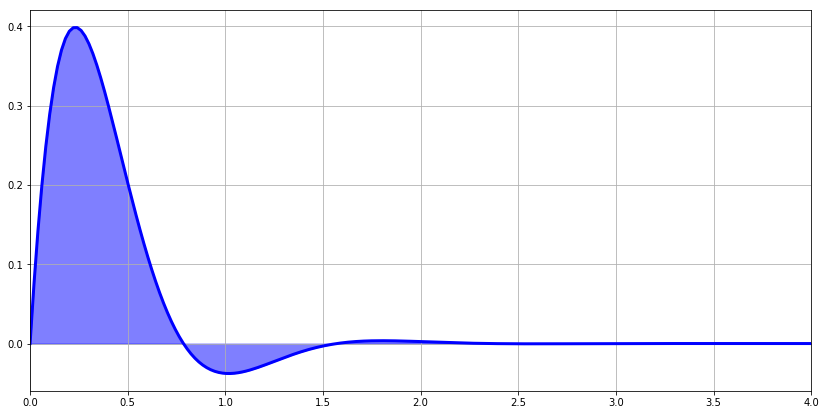

In [30]:
#Function
def f(x):
    return np.exp(-3*x)*np.sin(4*x)

#Plotting
X = np.linspace( 0, 4, 200 )
Y = f(X)
plt.figure( figsize=(14,7) )
plt.plot( X, Y, color="blue", lw=3 )
plt.fill_between( X, Y, color="blue", alpha=0.5 )
plt.xlim( 0,4 )
plt.grid()

Using composite numerical integration is not completely adequate for this problem as the function exhibits different behaviours for differente intervals. For the interval $[0,2]$ the function varies noticeably, requiring a rather small integration interval $h$. However, for the interval $[2,4]$ variations are not considerable and low-order composite integration is enough. This lays a pathological situation where simple composite methods are not efficient. In order to remedy this, we introduce an adaptive quadrature methods, where the integration step $h$ can vary according to the interval. The main advantage of this is a controlable precision of the result.

## Simpson's adaptive quadrature

Although adaptive quadrature can be readily applied to any quadrature method, we illustrate the method with  the Simpson's adaptive quadrature.

Let's assume a function $f(x)$. We want to compute the integral within the interval $[a,b]$. Using a simple Simpson's quadrature, we obtain:

$$\int_a^bf(x)dx = S(a,b) - \frac{h^5}{90}f^{(4)}(\xi)$$

where we introduce the notation:

$$S(a,b) = \frac{h}{3}\left[ f(a) + 4f(a+h) + f(b) \right]$$

and $h$ is simply $h = (b-a)/2$.

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/bb0f137366b3d2bbfdd33425ad78be4003716703/material/figures/adaptive_quadrature.png)

Now, instead of using an unique Simpson's quadrature, we implement two, by adding a new point in the midle of the interval $[a,b]$, $(a+b)/2$, yielding:

$$\int_a^bf(x)dx = S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) - \frac{1}{16}\left(\frac{h^5}{90}\right)f^{(4)}(\xi)$$

For this expression, we reasonably assume an equal fourth-order derivative $f^{(4)}(\xi) = f^{(4)}(\xi_1) = f^{(4)}(\xi_2) $, where $\xi_1$ is the estimative for the first subtinterval (i.e. $\xi_1\in[a,(a+b)/2]$), and $\xi_2$ for the second one (i.e. $\xi_1\in[(a+b)/2, b]$).

As both expressions can approximate the real value of the integrate, we can equal them, obtaining:

$$
\int_a^bf(x)dx \begin{cases} \sim S(a,b) - \frac{h^5}{90}f^{(4)}(\xi)\\ 
\approx S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) - \frac{1}{16}\left(\frac{h^5}{90}\right)f^{(4)}(\xi)\\
\end{cases}
$$

which leads us to a simple way to estimate the error without knowing the fourth-order derivative, i.e.

$$\frac{h^5}{90}f^{(4)}(\xi) = \frac{16}{15}\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|$$

If we fix a precision $\epsilon$, such that the obtained error for the second iteration is smaller

$$\frac{1}{16}\frac{h^5}{90}f^{(4)}(\xi) < \epsilon $$

it implies:

$$\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|< 15 \epsilon$$

and 

$$\left| \int_a^bf(x) dx- S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|< \epsilon$$

The second iteration is then $15$ times more precise than the first one.

## Steps Simpson's adaptive quadrature

**1.** Give the function $f(x)$ to be integrated, the inverval $[a,b]$ and set a desired precision $\epsilon$.

**2.** Compute the next Simpsons's quadratures:

$$ S(a,b),\ S\left(a,\frac{a+b}{2}\right),\ S\left(\frac{a+b}{2},b\right) $$

**3.** If 

$$\frac{1}{15}\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|<\epsilon$$

then the integration is ready and is given by:

$$\int_a^bf(x) dx \approx S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) $$

within the given precision.

**4.** If the previous step is not fulfilled, repeat from step **2** using as new intervals $[a,(a+b)/2]$ and $[(a+b)/2,b]$ and a new precision $\epsilon_1 = \epsilon/2$. Repeating until step 3 is fulfilled for all the subintervals.